In [1]:
import torch
from torch import nn # nn contains all of PyTorch's building blocks for neural networks
import matplotlib.pyplot as plt

# Check PyTorch version
torch.__version__

'2.1.0+cu121'

In [2]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [3]:
# Creating known parameters
weight = 0.7
bias = 0.3

# Create data
X = torch.arange(0, 1, 0.02).unsqueeze(dim=1)
y = weight * X + bias

#X[:11], y[:11] #Printing the first 10 data points

In [4]:
# Now we need to split our data into training and dev sets

train_split = int(0.8 * len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

len(X_train), len(y_train), len(X_test), len(y_test) 

(40, 40, 10, 10)

In [5]:
def plot_predictions(train_data = X_train,
                     train_labels = y_train,
                     test_data = X_test,
                     test_labels = y_test,
                     predictions = None):
  """
  Plots training data, test data and compares predictions
  """
  plt.figure(figsize=(10,7))

  # Plot training data in blue
  plt.scatter(train_data, train_labels, c = "b", s=6, label = "Training Data")

  # Plot test data in magenta
  plt.scatter(test_data, test_labels, c="m", s=6, label = "Test Data")

  if predictions is not None:
    # Plot the predictions in red (predictions are made on the test data)
    plt.scatter(test_data, predictions, c="r", s=6, label = "Predictions")
  plt.legend(prop={"size": 14});  

In [95]:
class LinearRegressionModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.weights = nn.Parameter(torch.randn(1,
                                                 requires_grad=True,
                                                   dtype=torch.float))
        self.bias = nn.Parameter(torch.randn(1,
                                                 requires_grad=True,
                                                   dtype=torch.float)) # by default gradient is recorded and data type is float32 therefore no need to explicitly specify it
    def forward(self, x : torch.Tensor):
          return self.weights * x + self.bias
torch.manual_seed(42)

model_0 = LinearRegressionModel()

In [96]:
# Making prediction using torch.inference.model()
# To check our model's predictive power

with torch.inference_mode():
    y_preds = model_0(X_test) # Inference mode does not save gradients, hence use of context manager.

y_preds

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])

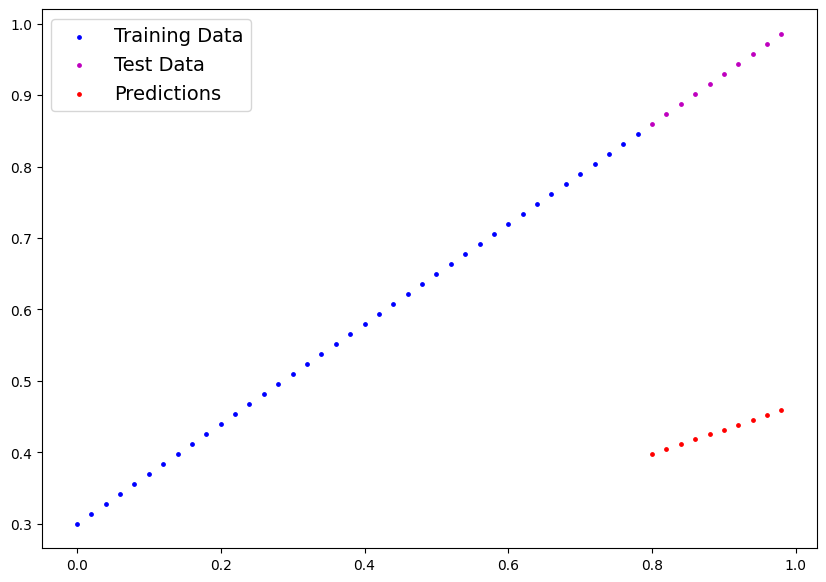

In [97]:
plot_predictions(predictions = y_preds)

In [98]:
# Training the model
# Loss function and optimiser required, for linear regression most likely mean squared error and 
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [99]:
loss_fn = nn.L1Loss()

optimiser = torch.optim.SGD(params=model_0.parameters(), lr = 0.01) # Stochastic Gradient Descent


In [121]:
# Training loop and testing loop
num_epochs = 25

for epoch in range(num_epochs):
    model_0.train() # train() makes requires_grad = True
    # Forward propogation
    y_preds = model_0(X_train)
    # Calculating loss 
    loss = loss_fn(y_preds, y_train)

    optimiser.zero_grad() 
    loss.backward() # Backpropagation
    optimiser.step() 
    if (epoch+1) % 5 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')
    #model_0.eval()
    model_0.eval()
    with torch.inference_mode():
model_0.state_dict()



Epoch [5/25], Loss: 0.0026
Epoch [10/25], Loss: 0.0089
Epoch [15/25], Loss: 0.0026
Epoch [20/25], Loss: 0.0089
Epoch [25/25], Loss: 0.0026


OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])

In [122]:
with torch.inference_mode():
    y_preds_new = model_0(X_test)

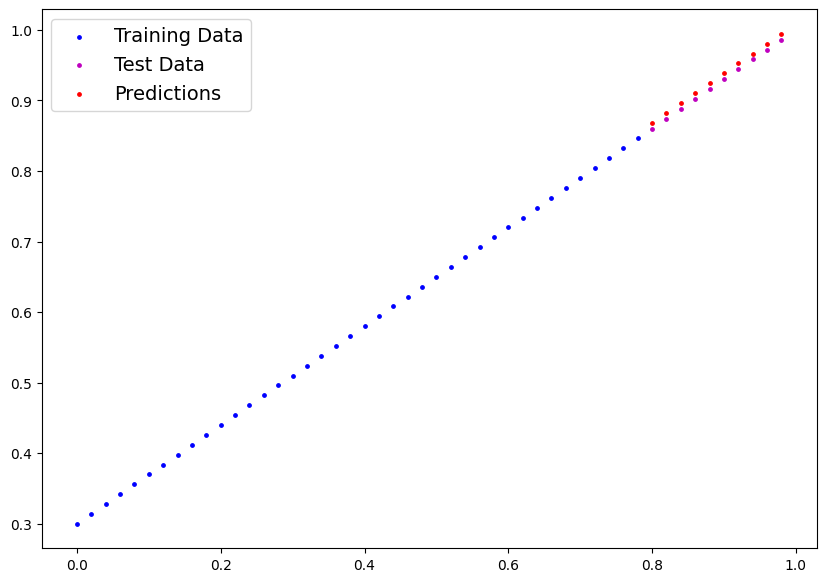

In [123]:
plot_predictions(predictions = y_preds_new)